# Project - Marketing Email Analysis and Prediction

# Project Description:

- A marketing company wants to make a internal spam email detection so that before sending any email they can findout if the email will be considered as spam or not. 
- Wants to find the words which are the cause for detecting an email as spam. And which words can be useful to be identified aas ham emails only.

# Problem Statement:

1. Detect Spam emails
2. Make a worcloud for spam emails and ham emails

# Dataset Details:

- Dataset Characteristics - Classification
- Number of Attributes - 2

# Attribute Information

- text -> Email messages
- spam -> If the email is spam or not.
    0 = Email is not a spam (it's a ham), 
    1 = Email is a spam

#  

#  

# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Data

In [2]:
email_df = pd.read_csv('emails.csv')
email_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [3]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# 3. Data Exploration

In [4]:
# Let's get the length of the every email
email_df['length'] = email_df['text'].apply(len)
email_df.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [5]:
print("Minimum Length of any message : ",email_df['length'].min(),"characters")

Minimum Length of any message :  13 characters


In [6]:
print("Maximum Length of any message : ",email_df['length'].max(),"characters")

Maximum Length of any message :  43952 characters


## Let's Divide the data into spam and ham

In [7]:
ham_data = email_df[email_df['spam']==0]
ham_data

,text,spam,length
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997
1370,Subject: from the enron india newsdesk - jan 1...,0,7902
1371,Subject: re : powerisk 2001 - your invitation ...,0,3644
1372,Subject: re : resco database and customer capt...,0,5535
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


In [8]:
spam_data = email_df[email_df['spam']==1]
spam_data

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1,347
1364,Subject: would you like a $ 250 gas card ? do...,1,188
1365,"Subject: immediate reply needed dear sir , i...",1,3164
1366,Subject: wanna see me get fisted ? fist bang...,1,734


In [9]:
print("Percentage of Spam Data : ",len(spam_data)*100/len(email_df))
print("Percentage of Ham Data : ",len(ham_data)*100/len(email_df))


Percentage of Spam Data :  23.88268156424581
Percentage of Ham Data :  76.11731843575419


In [10]:
# Let's see which message is the most popular ham/spam message
email_df.groupby('spam').describe()
# 0 -> Ham Messages
# 1 -> Spam Messages

length                                                                  
       count         mean          std   min     25%     50%      75%      max
spam                                                                          
0     4360.0  1631.918119  1959.664549  13.0  577.75  1122.0  2037.25  43952.0
1     1368.0  1317.257310  2271.372893  18.0  401.50   693.5  1250.25  28432.0

### From the above results :
#### Ham Messages(0) -> Total 4360 messages, Minimum message length is 13 and maximum is 43952
#### Spam Messages(1) -> total 1368 messages, Minimum message length is 18 and maximum is 28432

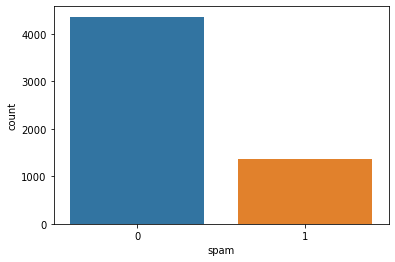

In [11]:
sns.countplot(email_df['spam'], label="Ham vs Spam Count")
## 0 is for ham and 1 is for spam

# 4. Text Preprocessing

In [12]:
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords   
from nltk.stem.porter import PorterStemmer
# from nltk.stem import WordNetLemmatizer

def preprocessing_message(message):
    review = re.sub('[^a-zA-Z]', ' ', message)
    review = review.lower()                   # to convert in the lower
    review = review.split()                   # to convert string into list by words
    ps = PorterStemmer()
    # l = WordNetLemmatizer()
    # removing of stop words and stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review) 
    return review


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91762\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Applying Text Processing on the Data

In [13]:
cleaned_text = email_df['text'].apply(preprocessing_message)
cleaned_text

0       subject natur irresist corpor ident lt realli ...
1       subject stock trade gunsling fanni merril muzo...
2       subject unbeliev new home made easi im want sh...
3       subject color print special request addit info...
4       subject money get softwar cd softwar compat gr...
                              ...                        
5723    subject research develop charg gpg forward shi...
5724    subject receipt visit jim thank invit visit ls...
5725    subject enron case studi updat wow day super t...
5726    subject interest david pleas call shirley cren...
5727    subject news aurora updat aurora version faste...
Name: text, Length: 5728, dtype: object

### Make the bag of words with CountVectorizer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(cleaned_text).toarray()
y = email_df.iloc[:, 1].values
print(X.shape)
print(y.shape)

(5728, 25607)
(5728,)


In [15]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## To visualize vectorized data with the Column names

In [16]:
## Convert Vectorized data into a DataFrame
df = pd.DataFrame(X,columns=cv.get_feature_names())
df

,aa,aaa,aaaenerfax,aadedeji,aagraw,aal,aaldou,aaliyah,aall,aanalysi,...,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df.sum().sort_values(ascending=False)

enron           13388
ect             11427
subject         10202
vinc             8532
hou              5577
                ...  
instrumentow        1
talkingstock        1
instructora         1
talktitl            1
limb                1
Length: 25607, dtype: int64

### Split the data into Train and Test

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4582, 25607)
(1146, 25607)
(4582,)
(1146,)


# 5. Training the model

Bernoulli Naive Bayes : It assumes that all our features are binary such that they take only two values. Means 0s can represent “word does not occur in the document” and 1s as "word occurs in the document" .

Multinomial Naive Bayes : Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent). In text learning we have the count of each word to predict the class or label.

Gaussian Naive Bayes : Because of the assumption of the normal distribution, Gaussian Naive Bayes is used in cases when all our features are continuous. For example in Iris dataset features are sepal width, petal width, sepal length, petal length. So its features can have different values in data set as width and length can vary. We can’t represent features in terms of their occurrences. This means data is continuous. Hence we use Gaussian Naive Bayes here.


In [18]:
# Fitting the classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# 6. Evaluation of the Model

### Predicting the X_test

In [19]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

### Confusion Matrix

In [20]:
# Creating confusion matrix for the model
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

cm

array([[875,  10],
       [ 35, 226]], dtype=int64)

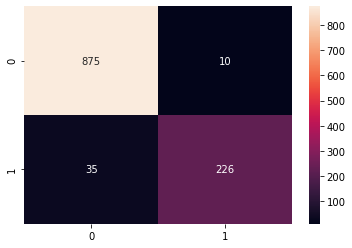

In [21]:
ax = sns.heatmap(cm, annot=True,fmt='g') # annpt=>to show the value , frmt='g' -> to ignore scientific notations 
ax.set_ylim([2,0]) # to set annots in center

plt.sca(ax)

### Accuracy of the Model

In [22]:
TN = cm[0,0]
TP = cm[1,1]
acc = ((TP+TN)/cm.sum())*100
print("Accuracy on the test data : %.2f"%(acc))

Accuracy on the test data : 96.07


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       885
           1       0.96      0.87      0.91       261

    accuracy                           0.96      1146
   macro avg       0.96      0.93      0.94      1146
weighted avg       0.96      0.96      0.96      1146



## Try by giving manual strings

In [24]:
s = input("Enter to Check if it is spam or not : ")
my = cv.transform([s]).toarray()
result = classifier.predict(my)
print("\nIt will be considered as a spam" if result[0]==1 else "Not a spam, Go ahead.")

Enter to Check if it is spam or not : Hurry, You have won the lottery

It will be considered as a spam


In [25]:
s = input("Enter to Check if it is spam or not : ")
my = cv.transform([s]).toarray()
result = classifier.predict(my)
print("\nIt will be considered as a spam" if result[0]==1 else "Not a spam, Go ahead.")

Enter to Check if it is spam or not : This is to inform you that interview
Not a spam, Go ahead.


# Word Cloud

In [27]:
spam_text = ' '.join(spam_data['text'])
spam_text

'Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [29]:
from wordcloud import WordCloud

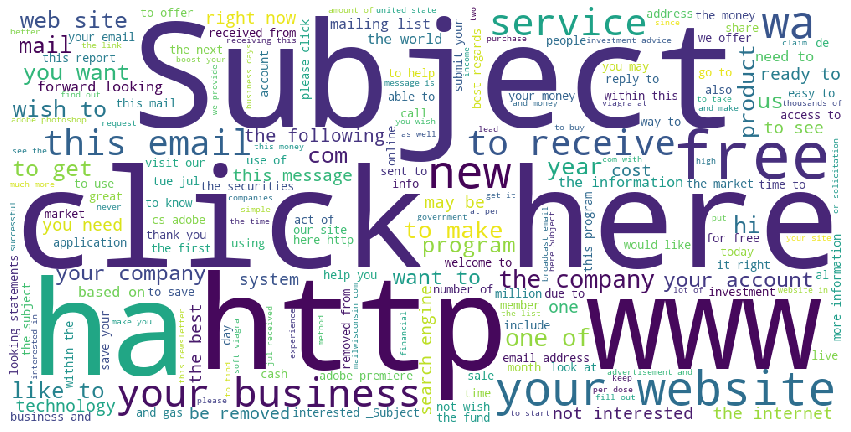

In [30]:
wordcloud = WordCloud(width = 1000, height = 500, stopwords = stopwords.words('english'), background_color = 'white').generate(
                        ''.join(spam_data['text']))
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [32]:
spam_data

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1,347
1364,Subject: would you like a $ 250 gas card ? do...,1,188
1365,"Subject: immediate reply needed dear sir , i...",1,3164
1366,Subject: wanna see me get fisted ? fist bang...,1,734


In [61]:
def preprocessing_message(message):
    review = re.sub('[^a-zA-Z]', ' ', message)
    review = review.lower()                   # to convert in the lower
    review = review.split()                   # to convert string into list by words
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review) 
    return review



def remove_words(text):
    word_list = ['Subject','subject','ect']
    for word in word_list:
        text = text.replace(word," ")
    return text

In [56]:
def make_cloud(data_wordcloud):
    wordcloud = WordCloud(width = 1000, height = 500, stopwords = stopwords.words('english'), background_color = 'white').generate(
                            ''.join(data_wordcloud))
    plt.figure(figsize = (15,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [57]:
spamdata_wordcloud = spam_data['text'].apply(remove_words)
spamdata_wordcloud = spamdata_wordcloud.apply(preprocessing_message)
spamdata_wordcloud

0       naturally irresistible corporate identity lt r...
1       stock trading gunslinger fanny merrill muzo co...
2       unbelievable new homes made easy im wanting sh...
3       color printing special request additional info...
4       money get software cds software compatibility ...
                              ...                        
1363    ready get hello viagra med struggle mens erect...
1364    would like gas card let current high price gas...
1365    immediate reply needed dear sir dr james alabi...
1366    wanna see get fisted fist bang show everything...
1367    hot stock info drgv announces another press re...
Name: text, Length: 1368, dtype: object

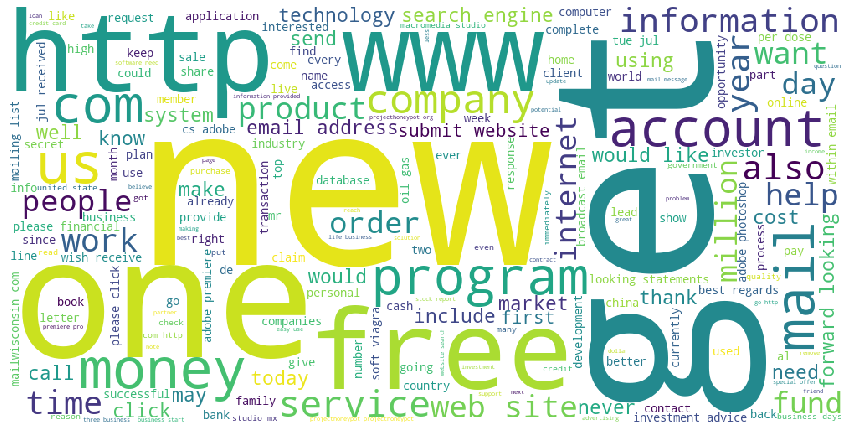

In [58]:
make_cloud(spamdata_wordcloud)

In [62]:
hamdata_wordcloud = ham_data['text'].apply(remove_words)
hamdata_wordcloud = hamdata_wordcloud.apply(preprocessing_message)
hamdata_wordcloud

1368    hello guys bugging completed questionnaire one...
1369    sacramento weather station fyi forwarded mike ...
1370    enron india newsdesk jan th newsclips vince fy...
1371    powerisk invitation angelika thanks invitation...
1372    resco database customer capture steve krishna ...
                              ...                        
5723    research development charges gpg forwarded shi...
5724    receipts visit jim thanks invitation visit lsu...
5725    enron case study update wow day super thank mu...
5726    interest david please call shirley crenshaw as...
5727    news aurora update aurora version fastest mode...
Name: text, Length: 4360, dtype: object

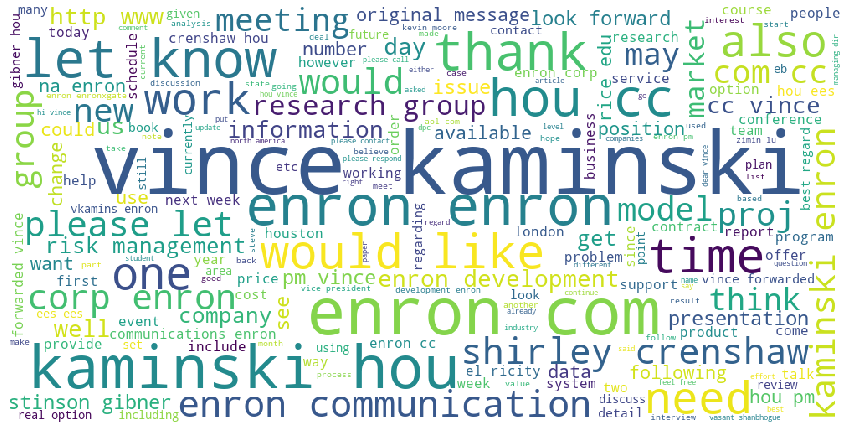

In [63]:
make_cloud(hamdata_wordcloud)